# 视觉变换样例库

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/resource/_static/logo_notebook.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.6.0rc1/docs/api_python/samples/dataset/vision_gallery.ipynb)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/resource/_static/logo_source.svg)](https://gitee.com/mindspore/mindspore/blob/v2.6.0/docs/api/api_python/samples/dataset/vision_gallery.ipynb)

此指南展示了[mindspore.dataset.vision](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/mindspore.dataset.transforms.html#%E8%A7%86%E8%A7%89)模块中各种变换的用法。

## 环境准备

In [1]:
from download import download
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

import mindspore.dataset as ds
import mindspore.dataset.vision as vision
import mindspore.common.dtype as dtype

# Download opensource datasets
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/flamingos.jpg"
download(url, './flamingos.jpg', replace=True)
orig_img = Image.open('flamingos.jpg')

# Env set for randomness and prepare plot function
ds.config.set_seed(66)

def plot(imgs, bbox_list=None, first_origin=True, **kwargs):
    num_rows = 1
    num_cols = len(imgs) + first_origin

    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    if first_origin:
        imgs = [orig_img] + imgs
    for idx, img in enumerate(imgs):
        ax = axs[0, idx]
        if isinstance(img, np.ndarray) and img.shape[0] in [1, 3]:
            img = img.transpose(1, 2, 0)
        ax.imshow(img, **kwargs)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

        if bbox_list:
            for bbox in bbox_list[idx]:
                rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

    if first_origin:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    plt.tight_layout()


file_sizes: 100%|███████████████████████████| 45.8k/45.8k [00:00<00:00, 204kB/s]
Successfully downloaded file to ./flamingos.jpg


## 几何变换

几何图像变换是指改变图像的几何属性，如其形状、大小、方向或位置，其涉及对图像像素或坐标进行数学运算。

### Pad

[mindspore.dataset.vision.Pad](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Pad.html#mindspore.dataset.vision.Pad) 会对图像的边缘填充像素。

In [ ]:
padded_imgs = [vision.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

![Pad](images/Pad.png)

### PadToSize

[mindspore.dataset.vision.PadToSize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.PadToSize.html#mindspore.dataset.vision.PadToSize) 会对图像的边缘填充像素，使其大小达到指定的大小。

In [ ]:
pad_to_size = [vision.PadToSize(size=size, fill_value=255, padding_mode=vision.Border.EDGE)(orig_img) for size in (500, 600, 700)]
plot(pad_to_size)

![PadToSize](images/PadToSize.png)

### Perspective

[mindspore.dataset.vision.Perspective](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Perspective.html#mindspore.dataset.vision.Perspective) 会对图像进行透视变换。

In [ ]:
start_points = [[0, 0], [255, 0], [0, 255], [255, 255]]
end_points = [[20, 30], [235, 25], [15, 220], [240, 230]]

perspective = vision.Perspective(start_points=start_points, end_points=end_points, interpolation=vision.Inter.BICUBIC)
imgs = [perspective(orig_img)]
plot(imgs)

![Perspective](images/Perspective.png)

### Resize

[mindspore.dataset.vision.Resize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Resize.html#mindspore.dataset.vision.Resize) 会调整图像的尺寸大小。
对输入图像使用给定的 [mindspore.dataset.vision.Inter](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Inter.html#mindspore.dataset.vision.Inter) 插值方式去调整为给定的尺寸大小。

In [ ]:
resized_imgs = [vision.Resize(size=size, interpolation=vision.Inter.BICUBIC)(orig_img) for size in (30, 50, 100)]
plot(resized_imgs)

![Resize](images/Resize.png)

### Crop

[mindspore.dataset.vision.Crop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Crop.html#mindspore.dataset.vision.Crop) 会对图像进行裁剪。

In [ ]:
crop = vision.Crop(coordinates=(180, 180), size=64)
imgs = [crop(orig_img)]
plot(imgs)

![Crop](images/Crop.png)

### ResizedCrop

[mindspore.dataset.vision.ResizedCrop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.ResizedCrop.html#mindspore.dataset.vision.ResizedCrop) 会对图像进行裁剪和调整大小。

In [ ]:
resize_crop = [vision.ResizedCrop(125, 100, 125, 100, size=size)(orig_img) for size in (30, 50, 100)]
plot(resize_crop)

![ResizedCrop](images/ResizedCrop.png)

### Rotate

[mindspore.dataset.vision.Rotate](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Rotate.html#mindspore.dataset.vision.Rotate) 会对图像进行旋转。

In [ ]:
rotate = vision.Rotate(degrees=-45, resample=vision.Inter.BILINEAR, expand=True, center=None, fill_value=125)
imgs = [rotate(orig_img)]
plot(imgs)

![Rotate](images/Rotate.png)

### VerticalFlip

[mindspore.dataset.vision.VerticalFlip](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.VerticalFlip.html#mindspore.dataset.vision.VerticalFlip) 会对图像进行垂直翻转。

In [ ]:
vertical_flip = vision.VerticalFlip()
imgs = [vertical_flip(orig_img)]
plot(imgs)

![VerticalFlip](images/VerticalFlip.png)

### CenterCrop

[mindspore.dataset.vision.CenterCrop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.CenterCrop.html#mindspore.dataset.vision.CenterCrop) 会在图像中裁剪出中心区域。

In [ ]:
center_crops = [vision.CenterCrop(size=size)(orig_img) for size in (30, 50, 100)]
plot(center_crops)

![CenterCrop](images/CenterCrop.png)

### FiveCrop

[mindspore.dataset.vision.FiveCrop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.FiveCrop.html#mindspore.dataset.vision.FiveCrop) 在图像的中心与四个角处分别裁剪指定尺寸大小的子图。

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = vision.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

![FiveCrop](images/FiveCrop.png)

### RandomPerspective

[mindspore.dataset.vision.RandomPerspective](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomPerspective.html#mindspore.dataset.vision.RandomPerspective) 会按照指定的概率对输入图像进行透视变换。

In [ ]:
perspective_transformer = vision.RandomPerspective(distortion_scale=0.6, prob=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

![RandomPerspective](images/RandomPerspective.png)

### RandomRotation

[mindspore.dataset.vision.RandomRotation](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomRotation.html#mindspore.dataset.vision.RandomRotation) 会随机旋转输入图像。

In [ ]:
rotater = vision.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

![RandomRotation](images/RandomRotation.png)

### RandomAffine

[mindspore.dataset.vision.RandomAffine](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomAffine.html#mindspore.dataset.vision.RandomAffine) 会对输入图像应用随机仿射变换。

In [ ]:
affine_transformer = vision.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot(affine_imgs)

![RandomAffine](images/RandomAffine.png)

### Affine

[mindspore.dataset.vision.Affine](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Affine.html#mindspore.dataset.vision.Affine)对输入图像进行仿射变换，保持图像中心不动。

In [ ]:
augmenter = vision.Affine(degrees=45, translate=[0.5, 0.5], scale=3.0, shear=0.5)
imgs = [augmenter(orig_img)]
plot(imgs)

![Affine](images/Affine.png)

### RandomCrop

[mindspore.dataset.vision.RandomCrop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomCrop.html#mindspore.dataset.vision.RandomCrop) 会对输入图像进行随机区域的裁剪。



In [ ]:
cropper = vision.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

![RandomCrop](images/RandomCrop.png)

### RandomCropDecodeResize

[mindspore.dataset.vision.RandomCropDecodeResize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomCropDecodeResize.html#mindspore.dataset.vision.RandomCropDecodeResize) 会对输入图像进行随机区域的裁剪、解码和调整大小。

In [ ]:
img_to_ndarray = vision.ToNumpy()
img = img_to_ndarray(orig_img)
encode_img = vision.encode_jpeg(img, 75)
random_crop = vision.RandomCropDecodeResize(size=224, scale=(0.08, 1.0), ratio=(0.75, 1.333), interpolation=vision.Inter.LINEAR)
imgs = [random_crop(encode_img)]
plot(imgs)

![RandomCropDecodeResize](images/RandomCropDecodeResize.png)

### RandomCropWithBBox

[mindspore.dataset.vision.RandomCropWithBBox](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomCropWithBBox.html#mindspore.dataset.vision.RandomCropWithBBox) 会对输入图像和边界框进行随机区域的裁剪。

In [ ]:
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
crop_bbox = vision.RandomCropWithBBox(size=300, padding=8, pad_if_needed=False, fill_value=(0, 0, 125), padding_mode=vision.Border.REFLECT)
imgs, bbox = crop_bbox(orig_img, bboxes)
plot([imgs], [bboxes, bbox])

![RandomCropWithBBox](images/RandomCropWithBBox.png)

### RandomResizedCrop

[mindspore.dataset.vision.RandomResizedCrop](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomResizedCrop.html#mindspore.dataset.vision.RandomResizedCrop) 会对输入图像进行随机裁剪，并将裁剪区域调整为指定的尺寸大小。

In [ ]:
resize_cropper = vision.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

![RandomResizedCrop](images/RandomResizedCrop.png)

## 光学变换

光学变换是指修改图像的测光属性，如其亮度、对比度、颜色或色调。这些变换的应用是为了改变图像的视觉外观，但保留其几何结构。

### AdjustBrightness

[mindspore.dataset.vision.AdjustBrightness](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustBrightness.html#mindspore.dataset.vision.AdjustBrightness) 会调整输入图像的亮度。

In [ ]:
adjust_brightness = [vision.AdjustBrightness(brightness_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_brightness)

![AdjustBrightness](images/AdjustBrightness.png)

### AdjustContrast

[mindspore.dataset.vision.AdjustContrast](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustContrast.html#mindspore.dataset.vision.AdjustContrast) 会调整输入图像的对比度。

In [ ]:
adjust_contrast = [vision.AdjustContrast(contrast_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_contrast)

![AdjustContrast](images/AdjustConrast.png)

### AdjustHue

[mindspore.dataset.vision.AdjustHue](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustHue.html#mindspore.dataset.vision.AdjustHue) 调整输入图像的色调。

In [ ]:
adjust_hue = [vision.AdjustHue(hue_factor=factor)(orig_img) for factor in (-0.2, 0.5, 0.1)]
plot(adjust_hue)

![AdjustHue](images/AdjustHue.png)

### AdjustGamma

[mindspore.dataset.vision.AdjustGamma](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustGamma.html#mindspore.dataset.vision.AdjustGamma) 对图像按照给定的gamma值进行[gamma矫正](https://en.wikipedia.org/wiki/Gamma_correction)。

In [ ]:
adjust_gamma = vision.AdjustGamma(gamma=3.0, gain=2)
imgs = [adjust_gamma(orig_img)]
plot(imgs)

![AdjustGamma](images/AdjustGamma.png)

### AdjustSaturation

[minspore.dataset.vision.AdjustSaturation](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustSaturation.html#mindspore.dataset.vision.AdjustSaturation) 调整图像的饱和度。

In [ ]:
adjust_saturation = [vision.AdjustSaturation(saturation_factor=factor)(orig_img) for factor in (.0, 0.5, 2.0)]
plot(adjust_saturation)

![AdjustSaturation](images/AdjustSaturation.png)

### AdjustSharpness

[mindspore.dataset.vision.AdjustSharpness](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AdjustSharpness.html#mindspore.dataset.vision.AdjustSharpness) 调整输入图像的锐度。

In [ ]:
adjust_sharpness = [vision.AdjustSharpness(sharpness_factor=factor)(orig_img) for factor in (0.5, 1.5, 2.0)]
plot(adjust_sharpness)

![AdjustSharpness](images/AdjustSharpness.png)

### ConvertColor

[mindspore.dataset.vision.ConvertColor](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.ConvertColor.html#mindspore.dataset.vision.ConvertColor) 将输入图像从一种颜色空间转换为另一种颜色空间。

In [ ]:
convert_color = vision.ConvertColor(convert_mode=vision.ConvertMode.COLOR_RGB2GRAY)
imgs = [convert_color(orig_img)]
plot(imgs)

![ConvertColor](images/ConvertColor.png)

### Normalize

[mindspore.dataset.vision.Normalize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Normalize.html#mindspore.dataset.vision.Normalize) 用 $output[channel] = \frac{input[channel] - mean[channel]}{std[channel]} \quad 对于 \quad channel \geq 1$ 对输入图像进行归一化。

In [ ]:
normalize = vision.Normalize(mean=[121.0, 115.0, 100.0], std=[70.0, 68.0, 71.0], is_hwc=True)
normalized_img = normalize(orig_img)
plot([normalized_img])

![Normalize](images/Normalize.png)

### NormalizePad

[mindspore.dataset.vision.NormalizePad](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.NormalizePad.html#mindspore.dataset.vision.NormalizePad)对输入图像进行归一化，并对图像的边缘填充像素。

In [ ]:
normalized_pad = vision.NormalizePad(mean=[121.0, 115.0, 100.0], std=[70.0, 68.0, 71.0], dtype="float32")
normalized_pad_img = normalized_pad(orig_img)
plot([normalized_pad_img])

![NormalizePad](images/NormalizePad.png)

### Equalize

[mindspore.dataset.vision.Equalize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Equalize.html#mindspore.dataset.vision.Equalize) 对输入图像进行直方图均衡化。

In [ ]:
equalize = vision.Equalize()
imgs = [equalize(orig_img)]
plot(imgs)

![Equalize](images/Equalize.png)

### Invert

[mindspore.dataset.vision.Invert](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Invert.html#mindspore.dataset.vision.Invert) 对输入的RGB图像进行色彩反转，即把RGB值的每个通道的值从x变为255-x。

In [ ]:
invert = vision.Invert()
imgs = [invert(orig_img)]
plot(imgs)

![Invert](images/Invert.png)

### Posterize

[mindspore.dataset.vision.Posterize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Posterize.html#mindspore.dataset.vision.Posterize) 减少图像的颜色通道的比特位数，使图像变得高对比度和颜色鲜艳，获得海报风格的图像。

In [ ]:
posterize = [vision.Posterize(bits=bits)(orig_img) for bits in (2, 6, 8)]
plot(posterize)

![Posterize](images/Posterize.png)

### Rescale

[mindspore.dataset.vision.Rescale](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Rescale.html#mindspore.dataset.vision.Rescale) 将输入图像的像素值缩放到指定的范围。

In [ ]:
rescale = vision.Rescale(1.0 / 128.0, -1.0)
rescaled_img = rescale(orig_img)
plot([rescaled_img])

![Rescale](images/Rescale.png)

### Solarize

[mindspore.dataset.vision.Solarize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Solarize.html#mindspore.dataset.vision.Solarize) 给定像素阈值min、max，反转该阈值内`[min,max]`的所有像素值，对输入图像按预期曝光。

In [ ]:
solarize = [vision.Solarize(threshold=threshold)(orig_img) for threshold in (0, 128.0, 255.0)]
plot(solarize)

![Solarize](images/Solarize.png)

### Grayscale

[mindspore.dataset.vision.Grayscale](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Grayscale.html#mindspore.dataset.vision.Grayscale) 把图像转换为灰度图。

In [ ]:
gray_img = vision.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

![Grayscale](images/Grayscale.png)

### RandomGrayscale

[mindspore.dataset.vision.RandomGrayscale](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomGrayscale.html#mindspore.dataset.vision.RandomGrayscale) 以指定的概率将图像转换为灰度图。

In [ ]:
random_grayscale = vision.RandomGrayscale(prob=0.5)
grayscale_img = random_grayscale(orig_img)
plot([grayscale_img])

![RandomGrayscale](images/RandomGrayscale.png)

### RandomColorAdjust

[mindspore.dataset.vision.RandomColorAdjust](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomColorAdjust.html#mindspore.dataset.vision.RandomColorAdjust) 会随机调整输入图像的亮度、对比度、饱和度和色调。

In [ ]:
jitter = vision.RandomColorAdjust(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

![RandomColorAdjust](images/RandomColorAdjust.png)

### GaussianBlur

[mindspore.dataset.vision.GaussianBlur](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.GaussianBlur.html#mindspore.dataset.vision.GaussianBlur) 会使用指定的高斯核对输入图像进行模糊处理。

In [ ]:
blurrer = vision.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

![GaussianBlur](images/GaussianBlur.png)

### RandomInvert

[mindspore.dataset.vision.RandomInvert](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomInvert.html#mindspore.dataset.vision.RandomInvert) 会以给定的概率随机反转图像的颜色。



In [ ]:
inverter = vision.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

![RandomInvert](images/RandomInvert.png)

### RandomPosterize

[mindspore.dataset.vision.RandomPosterize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomPosterize.html#mindspore.dataset.vision.RandomPosterize) 会随机减少图像的颜色通道的比特位数，使图像变得高对比度和颜色鲜艳。



In [ ]:
posterizer = vision.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

![RandomPosterize](images/RandomPosterize.png)

### RandomSolarize

[mindspore.dataset.vision.RandomSolarize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomSolarize.html#mindspore.dataset.vision.RandomSolarize) 会随机翻转给定范围内的像素。



In [ ]:
solarizer = vision.RandomSolarize(threshold=(0, 192))
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

![RandomSolarize](images/RandomSolarize.png)

### RandomAdjustSharpness

[mindspore.dataset.vision.RandomAdjustSharpness](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomAdjustSharpness.html#mindspore.dataset.vision.RandomAdjustSharpness) 会以给定的概率随机调整输入图像的锐度。



In [ ]:
sharpness_adjuster = vision.RandomAdjustSharpness(degree=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

![RandomAdjustSharpness](images/RandomAdjustSharpness.png)

### RandomAutoContrast

[mindspore.dataset.vision.RandomAutoContrast](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomAutoContrast.html#mindspore.dataset.vision.RandomAutoContrast) 会以给定的概率自动调整图像的对比度。

In [ ]:
autocontraster = vision.RandomAutoContrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

![RandomAutoContrast](images/RandomAutoContrast.png)

### RandomEqualize

[mindspore.dataset.vision.RandomEqualize](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomEqualize.html#mindspore.dataset.vision.RandomEqualize) 会以给定的概率随机对输入图像进行直方图均衡化。



In [ ]:
equalizer = vision.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

![RandomEqualize](images/RandomEqualize.png)

## 增强变换

以下的变换是多个变换的组合，通常来自论文提出的一些高效数据增强方法。

### AutoAugment

[mindspore.dataset.vision.AutoAugment](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.AutoAugment.html#mindspore.dataset.vision.AutoAugment) 会应用AutoAugment数据增强方法，增强的实现基于基于论文[AutoAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf)。

In [ ]:
augmenter = vision.AutoAugment(policy=vision.AutoAugmentPolicy.IMAGENET)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![AutoAugment](images/AutoAugment.png)

### BoundingBoxAugment

[mindspore.dataset.vision.BoundingBoxAugment](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.BoundingBoxAugment.html#mindspore.dataset.vision.BoundingBoxAugment) 会对输入图像进行边界框增强,应用给定的图像变换处理。

In [ ]:
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
transform = vision.RandomRotation(degrees=90)
bbox_augment = vision.BoundingBoxAugment(transform=transform, ratio=1.0)
img, bbox = bbox_augment(orig_img, bboxes)
plot([img], [bboxes, bbox])

![BoundingBoxAugment](images/BoundingBoxAugment.png)

### LinearTransformation

[mindspore.dataset.vision.LinearTransformation](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.LinearTransformation.html#mindspore.dataset.vision.LinearTransformation) 会按指定的变换方阵和均值向量对输入numpy.ndarray图像进行线性变换。

In [ ]:
height, width = 64, 64
dim = 3 * height * width

resize = vision.Resize((height, width))
resized_img = resize(orig_img)

augmenter = vision.LinearTransformation(transformation_matrix=np.eye(dim), mean_vector=np.zeros(dim))
array_img = np.array(resized_img).reshape(dim)
transformed_img = augmenter(array_img)
transformed_img = transformed_img.reshape(height, width, 3).astype(np.uint16)

plot([transformed_img])

![LinearTransformation](images/LinearTransformation.png)

### RandomColor

[mindspore.dataset.vision.RandomColor](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomColor.html#mindspore.dataset.vision.RandomColor) 会随机调整输入图像的颜色。适用于 3 通道RGB图像。

In [ ]:
augmenter = vision.RandomColor(degrees=[0.1, 1.9])
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomColor](images/RandomColor.png)

### RandomLighting

[mindspore.dataset.vision.RandomLighting](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomLighting.html#mindspore.dataset.vision.RandomLighting) 会随机调整输入图像的亮度。
将AlexNet PCA的噪声添加到图像中。Alexnet PCA噪声的特征值和特征向量是由ImageNet数据集计算得出。

In [ ]:
augmenter = vision.RandomLighting(alpha=1.0)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomLighting](images/RandomLighting.png)

### RandomSelectSubpolicy

[mindspore.dataset.vision.RandomSelectSubpolicy](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomSelectSubpolicy.html#mindspore.dataset.vision.RandomSelectSubpolicy) 会随机选择一个子策略，并应用该子策略中的变换。

In [ ]:
policy = [[(vision.RandomRotation((45, 45)), 0.5), (vision.RandomVerticalFlip(), 0.5)]]
augmenter = vision.RandomSelectSubpolicy(policy)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandomSelectSubpolicy](images/RandomSelectSubpolicy.png)

### ToTensor

[mindspore.dataset.vision.ToTensor](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.ToTensor.html#mindspore.dataset.vision.ToTensor) 会将PIL图像或Numpy数组转换为张量。

In [ ]:
to_tensor = vision.ToTensor()
img = to_tensor(orig_img)
plot([img])

![ToTensor](images/ToTensor.png)

### ToType

[mindspore.dataset.vision.ToType](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.ToType.html#mindspore.dataset.vision.ToType) 会将输入数据转换为指定的数据类型。

In [ ]:
to_type = vision.ToType(dtype.float32)
img = to_type(orig_img)
plot([img])

![ToType](images/ToType.png)

### HWC2CHW

[mindspore.dataset.vision.HWC2CHW](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.HWC2CHW.html#mindspore.dataset.vision.HWC2CHW) 会将输入图像的通道维度从HWC转换为CHW。

In [ ]:
hsc2chw = vision.HWC2CHW()
img = [hsc2chw(orig_img)]
plot(img)

![HWC2CHW](images/HWC2CHW.png)

### UniformAugment

[mindspore.dataset.vision.UniformAugment](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.UniformAugment.html#mindspore.dataset.vision.UniformAugment) 会应用UniformAugment数据增强方法，增强的实现基于论文[UniformAugment: A Simple Data Augmentation Strategy for Consistent Neural Network Training](https://arxiv.org/pdf/2003.14348.pdf)。

In [ ]:
transforms = [vision.RandomCrop(size=[20, 40], padding=[32, 32, 32, 32]), vision.RandomRotation(45)]
augmenter = vision.UniformAugment(transforms=transforms, num_ops=2)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![UniformAugment](images/UniformAugment.png)

### CutOut

[mindspore.dataset.vision.CutOut](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.CutOut.html#mindspore.dataset.vision.CutOut) 会在输入图像上随机裁剪一个矩形区域，并将该区域的像素值设置为0。

In [ ]:
augmenter = vision.CutOut(length=32, num_patches=2, is_hwc=True)
imgs = [augmenter(orig_img)]
plot(imgs)

![CutOut](images/CutOut.png)

### CutMixBatch

[mindspore.dataset.vision.CutMixBatch](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.CutMixBatch.html#mindspore.dataset.vision.CutMixBatch) 会对输入图像进行CutMix数据增强。通过在一批图像中随机选择两张图像，然后从一张图像中剪切出一个随机矩形区域并粘贴到另一张图像上，实现图像内容的混合。**使用此操作之前，标签应转换为 one-hot 编码格式并进行批处理**。

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

augment = vision.CutMixBatch(image_batch_format=vision.ImageBatchFormat.NHWC, alpha=1.0, prob=1.0)
images, labels = augment(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![CutMixBatch](images/CutMixBatch.png)

### MixUp

[mindspore.dataset.vision.MixUp](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.MixUp.html#mindspore.dataset.vision.MixUp) 会对输入图像进行MixUp数据增强。随机混合一批输入的`numpy.ndarray` 图像及其标签。将每个图像乘以一个从Beta分布随机生成的权重`lambda`，加上另一个图像与`1-lambda`之积。使用同样的`lambda`值将图像对应的标签进行混合。**请确保标签预先进行了one-hot编码。**

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

mixup = vision.MixUp(batch_size=batch_size, alpha=1.0)
images, labels = mixup(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![MixUp](images/MixUp.png)

### MixUpBatch

[mindspore.dataset.vision.MixUpBatch](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.MixUpBatch.html#mindspore.dataset.vision.MixUpBatch) 会对输入图像进行MixUp数据增强。此操作从批处理中随机选取两个图像，分别将其中一个图像乘以随机权重 `lambda`，另一个图像乘以 `1 - lambda`，将两者相加。相同的处理方式也应用于标注，`lambda` 的值是根据参数 `alpha` 通过Beta分布生成的，计算方式为：在 `[alpha, 1]` 范围内随机生成两个系数 $x_1$ 和 $x_2$，计算 $lambda = x_1 / (x_1 + x_2)$。**在调用此处理之前，需要将标注制作成 one-hot 格式并进行batch操作**。

In [ ]:
transformer = vision.Grayscale(3)
gray_img = transformer(orig_img)

images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

mixup_batch = vision.MixUpBatch(alpha=2.0)
images, labels = mixup_batch(images, one_hot_labels)
transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in images]
plot(transformed_images)

![MixUpBatch](images/MixUpBatch.png)

[MixUp](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.MixUp.html#mindspore.dataset.vision.MixUp) 和 [MixUpBatch](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.MixUpBatch.html#mindspore.dataset.vision.MixUpBatch)中的alpha参数是用于生成混合系数的 Beta 分布的形状参数。

alpha值越大，Beta分布越趋向于均匀分布，lambda值将更加倾向于 0.5，从而导致更加均衡的图像混合。相反，alpha较小时，lambda值更可能接近 0 或 1，这意味着混合图像将更倾向于其中一个原始图像。

为了更好的理解，不同的alpha值会导致不同的混合效果，可参考以下样例。作为原始图像使用已定义的orig_img和它的旋转后的图像。

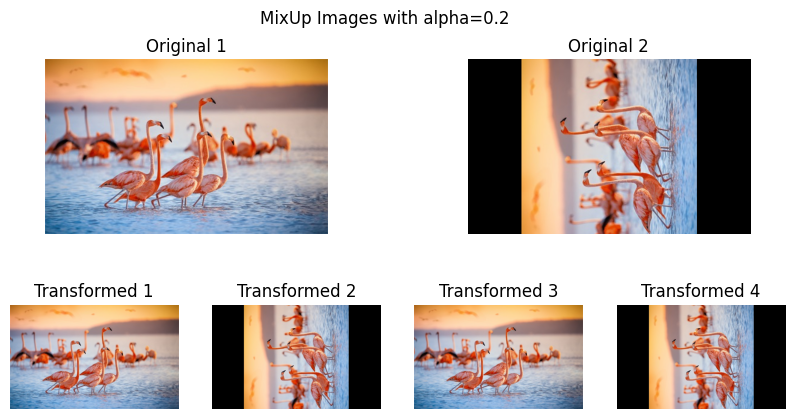

Lambda value for alpha=0.2: 0.9782197460880944


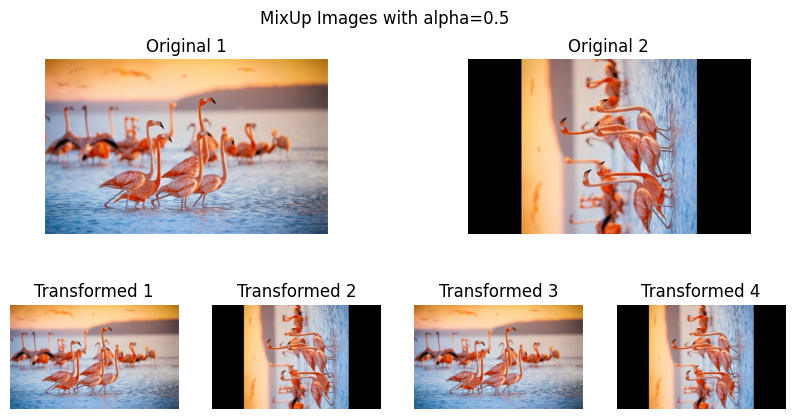

Lambda value for alpha=0.5: 0.9870954124682336


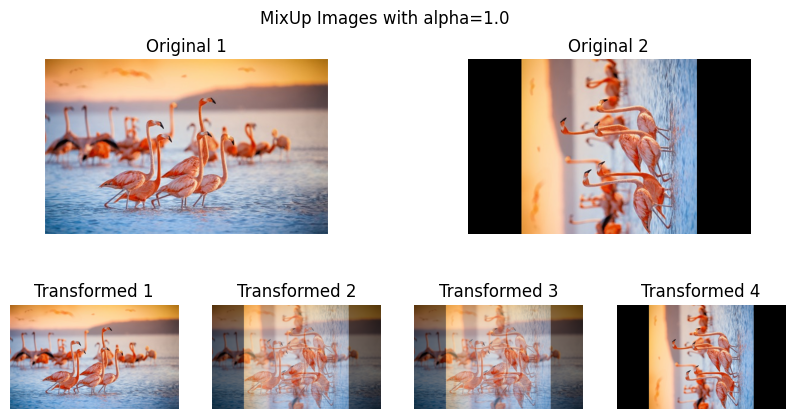

Lambda value for alpha=1.0: 0.13932897475036013


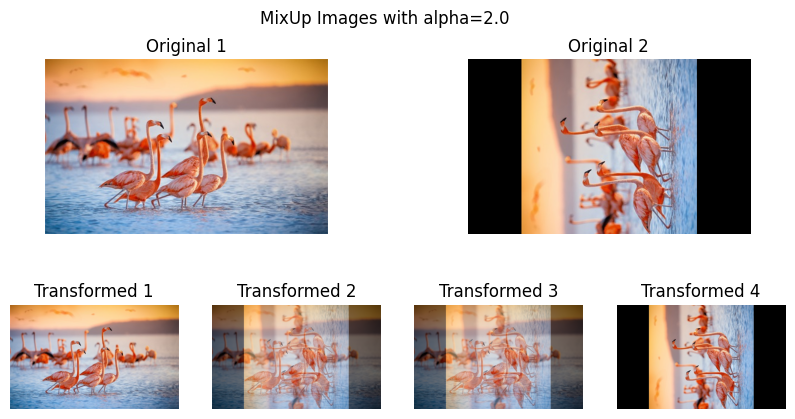

Lambda value for alpha=2.0: 0.22601399133292524
Execution Time: 0.0017924308776855469 seconds


In [58]:
# 定义一个可视化函数
def visualize_images(original, transformed, title):
    plt.figure(figsize=(10, 5))
    for i in range(len(original)):
        plt.subplot(2, len(original), i + 1)
        plt.imshow(original[i])
        plt.title(f"Original {i+1}")
        plt.axis('off')

    for i in range(len(transformed)):
        plt.subplot(2, len(transformed), len(original) + i + 3)
        plt.imshow(transformed[i])
        plt.title(f"Transformed {i+1}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# 原始图像加载和处理
transformer = vision.Rotate(degrees=90)
gray_img = transformer(orig_img)

# 构建批次数据
images = np.stack([np.array(orig_img), gray_img, np.array(orig_img), gray_img], axis=0)
num_classes = 10
batch_size = 4
labels = np.random.randint(0, num_classes, size=(batch_size,))
one_hot_labels = np.eye(num_classes)[labels]

# 计算 lambda 值的函数
def calculate_lambda(alpha):
    x1 = np.random.beta(alpha, alpha)
    x2 = np.random.beta(alpha, alpha)
    return x1 / (x1 + x2)

# 应用 MixUpBatch 算子
def apply_mixup_and_visualize(alpha=1.0):
    mixup_batch = vision.MixUpBatch(alpha=alpha)
    mixed_images, _ = mixup_batch(images, one_hot_labels)
    transformed_images = [Image.fromarray(image.astype(np.uint8)) for image in mixed_images]
    visualize_images([orig_img, gray_img], transformed_images, f"MixUp Images with alpha={alpha}")
    lambda_val = calculate_lambda(alpha)
    print(f"Lambda value for alpha={alpha}: {lambda_val}")

# 测试不同 alpha 值的效果
for alpha in [0.2, 0.5, 1.0, 2.0]:
    apply_mixup_and_visualize(alpha=alpha)

# 性能测试
import time
start_time = time.time()
mixup_batch = vision.MixUpBatch(alpha=1.0)
mixed_images, _ = mixup_batch(images, one_hot_labels)
print("Execution Time:", time.time() - start_time, "seconds")

### SlicePatches

[mindspore.dataset.vision.SlicePatches](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.SlicePatches.html#mindspore.dataset.vision.SlicePatches) 会将输入图像切割成多个小块。

In [ ]:
num_h, num_w = 1, 4
slice_patches_op = vision.SlicePatches(num_height=num_h, num_width=num_w, slice_mode=vision.SliceMode.PAD, fill_value=0)

# Convert image to Mindspore dataset
data = np.array([orig_img])
numpy_slices_dataset = ds.NumpySlicesDataset(data, ["image"])
transforms_list = [slice_patches_op]
cols = ['img' + str(x) for x in range(num_h * num_w)]

# Apply the SlicePatches transform
numpy_slices_dataset = numpy_slices_dataset.map(operations=transforms_list, input_columns=["image"], output_columns=cols)

# Retrieve the patched images and plot them
for item in numpy_slices_dataset.create_dict_iterator(num_epochs=1, output_numpy=True):
    patch_images = [item[col] for col in cols]
    plot(patch_images)

![SlicePatches](images/SlicePatches.png)

### Erase

[mindspore.dataset.vision.Erase](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.Erase.html#mindspore.dataset.vision.Erase) 使用指定的值擦除输入图像，用指定的像素值填充区域。

In [ ]:
augmenter = vision.Erase(top=20, left=25, height=50, width=50, value=128, inplace=True)
imgs = [augmenter(orig_img)]
plot(imgs)

![Erase](images/Erase.png)

### RandAugment

[mindspore.dataset.vision.RandAugment](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandAugment.html#mindspore.dataset.vision.RandAugment) 会对输入图像应用RandAugment数据增强方法，增强的实现基于基于论文[RandAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1909.13719.pdf)。



In [ ]:
augmenter = vision.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![RandAugment](images/RandAugment.png)

### TrivialAugmentWide

[mindspore.dataset.vision.TrivialAugmentWide](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.TrivialAugmentWide.html#mindspore.dataset.vision.TrivialAugmentWide)会对输入图像应用TrivialAugmentWide数据增强方法，增强的实现基于基于论文[TrivialAugmentWide: Tuning-free Yet State-of-the-Art Data Augmentation](https://arxiv.org/abs/2103.10158)。


In [ ]:
augmenter = vision.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

![TrivialAugmentWide](images/TrivialAugmentWide.png)

## 随机应用的变换

有些变换是以按照给定概率随机应用的。也就是说，转换后的图像可能与原始图像相同。

### RandomHorizontalFlip

[mindspore.dataset.vision.RandomHorizontalFlip](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlip.html#mindspore.dataset.vision.RandomHorizontalFlip)会对输入图像进行水平随机翻转。

In [ ]:
hflipper = vision.RandomHorizontalFlip(0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomHorizontalFlip](images/RandomHorizontalFlip.png)

### RandomHorizontalFlipWithBBox

[mindspore.dataset.vision.RandomHorizontalFlipWithBBox](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlipWithBBox.html#mindspore.dataset.vision.RandomHorizontalFlipWithBBox) 按给定的概率,会对输入图像和边界框进行水平随机翻转。

In [ ]:
random_flip = vision.RandomHorizontalFlipWithBBox(0.7)
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
img, bbox = random_flip(orig_img, bboxes)
plot([img], [bboxes, bbox])

![RandomHorizontalFlipWithBBox](images/RandomHorizontalFlipWithBBox.png)

### RandomVerticalFlip

[mindspore.dataset.vision.RandomVerticalFlip](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlip.html#mindspore.dataset.vision.RandomVerticalFlip) 会对输入图像进行垂直随机翻转。

In [ ]:
vflipper = vision.RandomVerticalFlip(0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomVerticalFlip](images/RandomVerticalFlip.png)

### RandomVerticalFlipWithBBox

[mindspore.dataset.vision.RandomVerticalFlipWithBBox](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlipWithBBox.html#mindspore.dataset.vision.RandomVerticalFlipWithBBox) 会对输入图像和边界框进行垂直随机翻转。

In [ ]:
random_flip = vision.RandomVerticalFlipWithBBox(0.7)
bboxes = np.array([[50, 50, 125, 125]], dtype=np.float32)
img, bbox = random_flip(orig_img, bboxes)
plot([img], [bboxes, bbox])

![RandomVerticalFlipWithBBox](images/RandomVerticalFlipWithBBox.png)

### RandomApply

[mindspore.dataset.transforms.RandomApply](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset_transforms/mindspore.dataset.transforms.RandomApply.html#mindspore.dataset.transforms.RandomApply) 可以指定一组数据增强处理及其被应用的概率，在运算时按概率随机应用其中的增强处理。

In [ ]:
import mindspore.dataset.transforms as T

applier = T.RandomApply(transforms=[vision.RandomCrop(size=(64, 64))], prob=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

![RandomApply](images/RandomApply.png)

## 在数据Pipeline中加载和处理图像文件

使用 [mindspore.dataset.ImageFolderDataset](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/dataset/mindspore.dataset.ImageFolderDataset.html#mindspore.dataset.ImageFolderDataset) 将磁盘中的图像文件内容加载到数据Pipeline中，并进一步应用其他增强操作。


file_sizes: 100%|███████████████████████████| 45.7k/45.7k [00:00<00:00, 157kB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
column names: ['image', 'label']
>>>>> after decode
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 4
(64, 64, 3) 4
(64, 64, 3) 4
>>>>> after resize
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 4
(48, 48, 3) 4
(48, 48, 3) 4


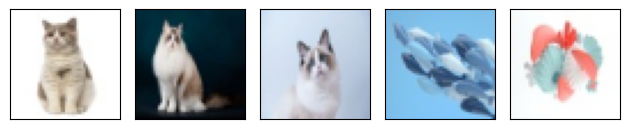

In [68]:
from download import download

import os
import mindspore.dataset as ds

# Download a small imagenet as example
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/imageset.zip"
download(url, "./", kind="zip", replace=True)

# There are 5 classes in the image folder.
os.listdir("./imageset")

# Load these 5 classes into dataset pipeline
dataset = ds.ImageFolderDataset("./imageset", shuffle=False)

# check the column names inside the dataset. "image" column represents the image content and "label" column represents the corresponding label of image.
print("column names:", dataset.get_col_names())

# since the original image is not decoded, apply decode first on "image" column
dataset = dataset.map(vision.Decode(), input_columns=["image"])

# check results
print(">>>>> after decode")
for data, label in dataset:
    print(data.shape, label)

# let's do some transforms on dataset
# apply resize on images
dataset = dataset.map(vision.Resize(size=(48, 48)), input_columns=["image"])

# check results
print(">>>>> after resize")
images = []
for image, label in dataset:
    images.append(image.asnumpy())
    print(image.shape, label)

plot(images[:5], first_origin=False)